<h1>Feature Selection</h1>

In [1]:
import numpy as np
import pandas as pd

In [2]:
std = pd.read_csv("Dataset/StudentsPerformance.csv")

In [7]:
std.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [3]:
std = std.rename(columns={"race/ethnicity":"group","parental level of education":"education","test preparation course":"course_completation","math score":"math_score","reading score":"reading_score","writing score":"writing_score"})
std.head()

,gender,group,education,lunch,course_completation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
num = ['math_score','reading_score','writing_score']
cat = ['gender','group','education','lunch','course_completation']

In [13]:
std = std[num+cat]
std.head()

,math_score,reading_score,writing_score,gender,group,education,lunch,course_completation
0,72,72,74,female,group B,bachelor's degree,standard,none
1,69,90,88,female,group C,some college,standard,completed
2,90,95,93,female,group B,master's degree,standard,none
3,47,57,44,male,group A,associate's degree,free/reduced,none
4,76,78,75,male,group C,some college,standard,none


In [11]:
traindf = pd.concat([std[num], pd.get_dummies(std[cat])],axis=1)
features = traindf.columns

traindf = traindf.dropna()

In [12]:
traindf = pd.DataFrame(traindf,columns=features)

In [15]:
y = traindf['math_score']>=87
X = traindf.copy()
del X['math_score']

In [16]:
X.shape

(1000, 19)

In [17]:
y.tail()

995     True
996    False
997    False
998    False
999    False
Name: math_score, dtype: bool

In [18]:
len(X.columns)

19

In [19]:
num_feats=30

In [20]:
feature_name = list(X.columns)
feature_name

['reading_score',
 'writing_score',
 'gender_female',
 'gender_male',
 'group_group A',
 'group_group B',
 'group_group C',
 'group_group D',
 'group_group E',
 "education_associate's degree",
 "education_bachelor's degree",
 'education_high school',
 "education_master's degree",
 'education_some college',
 'education_some high school',
 'lunch_free/reduced',
 'lunch_standard',
 'course_completation_completed',
 'course_completation_none']

<h1>Filter based-Pearson Correlation</h1>

In [21]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

19 selected features


In [22]:
cor_feature

['education_some college',
 'group_group B',
 'group_group D',
 'group_group A',
 "education_master's degree",
 'group_group C',
 "education_bachelor's degree",
 'education_some high school',
 "education_associate's degree",
 'education_high school',
 'gender_female',
 'gender_male',
 'course_completation_none',
 'course_completation_completed',
 'lunch_free/reduced',
 'lunch_standard',
 'group_group E',
 'writing_score',
 'reading_score']

<h1>Clustering</h1>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [30]:
stdn = std.iloc[:, 0:5]
stdn.head()

,math_score,reading_score,writing_score,gender,group
0,72,72,74,female,group B
1,69,90,88,female,group C
2,90,95,93,female,group B
3,47,57,44,male,group A
4,76,78,75,male,group C


In [31]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

stdn['group'] = lb.fit_transform(stdn['group'])

In [33]:
stdn = stdn.drop(['gender'], axis=1)
stdn.head()

,math_score,reading_score,writing_score,group
0,72,72,74,1
1,69,90,88,2
2,90,95,93,1
3,47,57,44,0
4,76,78,75,2


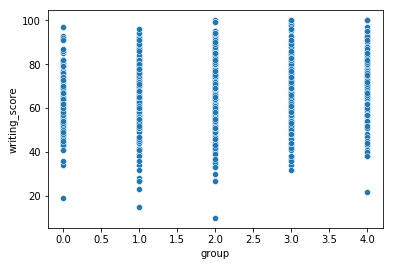

In [26]:
import seaborn as sns
sns.scatterplot(x="group", y="writing_score", data=stdn)

In [34]:
import numpy as np
x_array = np.array(stdn)
print(x_array)

[[72 72 74  1]
 [69 90 88  2]
 [90 95 93  1]
 ...
 [59 71 65  2]
 [68 78 77  3]
 [77 86 86  3]]


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.72      , 0.6626506 , 0.71111111, 0.25      ],
       [0.69      , 0.87951807, 0.86666667, 0.5       ],
       [0.9       , 0.93975904, 0.92222222, 0.25      ],
       ...,
       [0.59      , 0.65060241, 0.61111111, 0.5       ],
       [0.68      , 0.73493976, 0.74444444, 0.75      ],
       [0.77      , 0.8313253 , 0.84444444, 0.75      ]])

In [37]:
#Konfigurasi
kmeans = KMeans(n_clusters = 4, random_state=123)
#Ambil Kluster dari data
kmeans.fit(x_scaled)

KMeans(n_clusters=4, random_state=123)

In [38]:
center = kmeans.cluster_centers_
print(center)

[[0.5321374  0.46693645 0.4908821  0.65171756]
 [0.7419661  0.75278742 0.76060264 0.39152542]
 [0.76940959 0.74209754 0.75817958 0.85332103]
 [0.54697674 0.48269823 0.50342377 0.15116279]]


In [39]:
label = kmeans.labels_
print (label)

[1 1 1 3 1 1 1 3 0 3 0 0 1 3 3 1 1 3 0 0 0 1 0 1 2 3 3 1 1 2 2 3 2 0 2 2 2
 0 2 3 0 1 3 3 0 3 3 1 2 1 0 2 0 2 1 0 2 0 0 0 2 3 3 1 0 3 0 1 3 0 0 0 3 0
 0 3 0 1 2 2 3 3 3 2 0 1 1 2 3 2 1 0 1 0 1 1 3 2 0 0 1 2 2 3 1 1 2 2 1 1 2
 0 3 0 2 1 1 2 0 0 1 1 1 0 2 1 1 2 2 3 2 0 2 1 2 0 3 0 0 2 2 0 0 3 2 0 1 1
 2 2 3 3 3 0 0 1 2 3 1 0 1 2 3 0 2 1 0 1 1 1 3 2 2 1 0 1 3 1 3 2 1 0 0 2 0
 1 2 0 3 1 2 2 3 0 1 0 0 0 3 1 1 2 1 3 0 2 2 2 1 3 2 0 0 0 2 1 2 0 1 3 2 1
 0 2 3 0 1 0 3 1 2 0 1 2 1 2 0 0 3 1 2 2 0 0 2 1 2 3 3 0 3 2 1 2 0 2 1 1 1
 1 1 1 0 2 2 0 1 2 2 2 0 0 0 2 1 1 1 2 1 3 0 0 2 2 3 1 2 1 1 2 1 2 0 2 2 3
 3 2 0 2 1 0 1 1 1 3 2 0 3 0 1 3 0 1 1 1 2 1 1 0 1 2 1 0 0 1 0 3 1 3 0 0 0
 1 1 3 2 0 3 0 0 1 1 2 2 1 3 1 2 2 3 0 1 0 1 1 3 0 0 2 3 1 0 0 0 3 0 0 3 2
 2 0 2 2 2 0 2 2 1 3 1 1 1 0 3 2 2 1 0 2 2 2 2 0 1 3 3 1 3 0 0 3 3 2 0 1 3
 1 0 2 2 2 0 3 1 2 1 1 0 0 1 0 0 1 3 0 1 1 3 0 0 1 0 3 1 0 2 2 0 2 1 2 3 1
 1 1 0 1 3 1 1 2 1 0 0 0 2 0 2 1 0 3 2 1 3 1 0 3 1 1 1 1 1 0 1 2 2 2 0 2 1
 0 1 3 3 1 0 1 3 1 1 1 1 

In [41]:
std["kluster"] = kmeans.labels_
std.head()

,math_score,reading_score,writing_score,gender,group,education,lunch,course_completation,kluster
0,72,72,74,female,group B,bachelor's degree,standard,none,1
1,69,90,88,female,group C,some college,standard,completed,1
2,90,95,93,female,group B,master's degree,standard,none,1
3,47,57,44,male,group A,associate's degree,free/reduced,none,3
4,76,78,75,male,group C,some college,standard,none,1


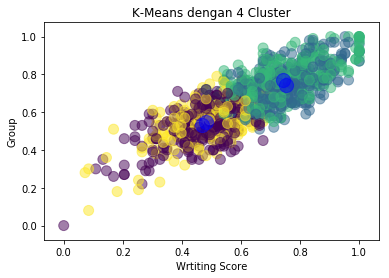

In [42]:
fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 100,
c = std.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s=200, alpha=0.5)
plt.title("K-Means dengan 4 Cluster")
plt.xlabel("Wrtiting Score")
plt.ylabel("Group")
plt.show()

In [43]:
from scipy.spatial.distance import cdist

In [44]:
distorsi = [] 
inersia = [] 
n1 = {} 
n2 = {} 
K = range(1,11) 
  
for k in K:
    kmeans = KMeans(n_clusters=k).fit(x_scaled) 
    kmeans.fit(x_scaled) 
    distorsi.append(sum(np.min(cdist(x_scaled, kmeans.cluster_centers_, 'euclidean'),axis=1)) / x_scaled.shape[0]) 
    inersia.append(kmeans.inertia_)   
    n1[k] = sum(np.min(cdist(x_scaled, kmeans.cluster_centers_, 'euclidean'),axis=1)) / x_scaled.shape[0] 
    n2[k] = kmeans.inertia_ 

In [45]:
for key,val in n1.items(): 
    print('Iterasi '+str(key)+' : '+str(val))

Iterasi 1 : 0.36893738178721497
Iterasi 2 : 0.291988052525269
Iterasi 3 : 0.25041860736939664
Iterasi 4 : 0.22053393719830683
Iterasi 5 : 0.20486646695238278
Iterasi 6 : 0.19128937216113787
Iterasi 7 : 0.180051646675036
Iterasi 8 : 0.16716334446891942
Iterasi 9 : 0.15764333105577294
Iterasi 10 : 0.14779968337447433


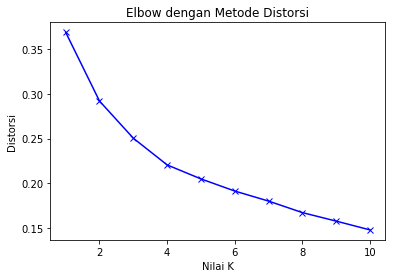

In [46]:
plt.plot(K, distorsi, 'bx-') 
plt.xlabel('Nilai K') 
plt.ylabel('Distorsi') 
plt.title('Elbow dengan Metode Distorsi') 
plt.show() 